In [21]:
#Importing necessary libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random
from sklearn.model_selection import train_test_split
np.random.seed(1337)
from sklearn.preprocessing import StandardScaler

In [22]:
#Defining the Franke function given in the project text

def FrankeFunction(x,y,noise_std):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    noise = noise_std * np.random.randn(N*N)
    return term1 + term2 + term3 + term4 + noise

/tmp/ipykernel_601/358522003.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


TypeError: FrankeFunction() missing 1 required positional argument: 'noise_std'

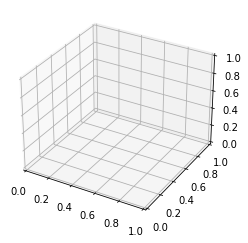

In [23]:
#Copy of the code for 3D plot of franke functuin given in project text
fig = plt.figure()
ax = fig.gca(projection='3d')


# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)
z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [24]:
#The following code is where we compute the pseudo matrix inversion from the singular value decomposition, compute the Mean Squared Error and 
#function.

#Code for setting up our design matrix

def create_x(x,y,n):
        
    L = len(x)
    X = np.ones((L, int((n + 1) * (n + 2) / 2)))

    for i in range(n + 1):
        t = int((i) * (i + 1) / 2)
        for j in range(i + 1):
            X[:, t + j] = x ** (i - j) * y ** j

    return X

In [25]:
#Defining the Mean squerred error and R2score functions
def MSE(z, z_pred):
    n = np.size(z_pred)
    return np.mean((z - z_pred) ** 2)


def R2(z, z_pred):
    return 1 - np.sum((z - z_pred) ** 2) / np.sum((z - np.mean(z)) ** 2)



def Scale(X_train, X_test, z_train, z_test):
    scaler = StandardScaler() #scikit standardscaler

    scaler_x = scaler.fit(X_train) 
    X_train_scaled = scaler_x.transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)

    scaler_z = scaler.fit(z_train.reshape(-1,1))
    z_train_scaled = scaler_z.transform(z_train.reshape(-1,1)).ravel()
    z_test_scaled = scaler_z.transform(z_test.reshape(-1,1)).ravel()

    return X_train_scaled, X_test_scaled, z_train_scaled, z_test_scaled

In [26]:
# Make data set.
np.random.seed(1337)
N = 50 #Number of points
n= 5 #Max polynomialdegree
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))

x_mesh, y_mesh = np.meshgrid(x,y)
x_flatten = np.ravel(x_mesh) 
y_flatten = np.ravel(y_mesh)


z  = FrankeFunction(x_flatten, y_flatten, 0.0)

R2_train = np.zeros(n+1)
R2_test = np.zeros(n+1)
MSE_train = np.zeros(n+1)
MSE_test = np.zeros(n+1)
Polynomdegree = np.zeros(n+1)                 

#Preforming OSL regression using the pseudo inverse functuinality in np.linalg in a for loop to give us R2 and MSE 
#for polynomials from degree 1-5 before the data is scaled and without noise
print("---Before scaling---")
for i in range(n+1):
                  
    polynomialdegree = i
    Polynomdegree[i] =  polynomialdegree
                  
    X = create_x(x_flatten, y_flatten, n)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

    beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train

    z_t = X_train @ beta
    z_pred = X_test @ beta
    R2_train[i] = R2(z_train, z_t)
    R2_test[i] =R2(z_test, z_pred)
    MSE_train[i] =  MSE(z_train, z_t) 
    MSE_test[i] =  MSE(z_test, z_pred)
                 
    print("--- Polynomial degree ", i,"---")  
    print("Training R2 for OLS degree")
    print (R2(z_train, z_t))
    print("Training MSE for OLS")
    print(MSE(z_train, z_t))
    print("Test R2 for OLS")
    print(R2(z_test, z_pred))
    print("Test MSE OLS")
    print(MSE(z_test, z_pred))
    print("")

---Before scaling---
--- Polynomial degree  0 ---
Training R2 for OLS degree
0.9769257788620641
Training MSE for OLS
0.0017934186657138325
Test R2 for OLS
0.9745088416956493
Test MSE OLS
0.002073705088434968

--- Polynomial degree  1 ---
Training R2 for OLS degree
0.976196640391289
Training MSE for OLS
0.0018444397275594522
Test R2 for OLS
0.977060704285407
Test MSE OLS
0.0018799765826657397

--- Polynomial degree  2 ---
Training R2 for OLS degree
0.9769438449631341
Training MSE for OLS
0.0017557806906758958
Test R2 for OLS
0.9744438393227649
Test MSE OLS
0.0022372303494397547

--- Polynomial degree  3 ---
Training R2 for OLS degree
0.9756298387183787
Training MSE for OLS
0.001874610338461931
Test R2 for OLS
0.9793771728270836
Test MSE OLS
0.0017438121302513529

--- Polynomial degree  4 ---
Training R2 for OLS degree
0.977223567009475
Training MSE for OLS
0.0017855194055984797
Test R2 for OLS
0.9733396307680743
Test MSE OLS
0.0020962828532296767

--- Polynomial degree  5 ---
Training R

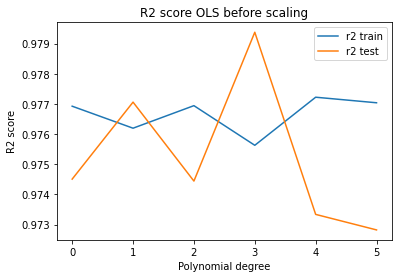

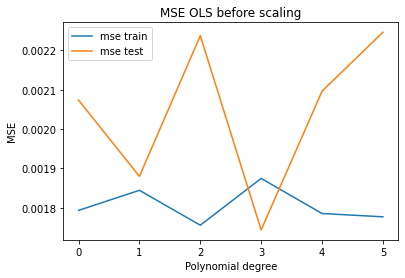

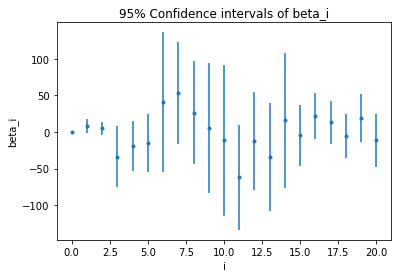

In [27]:

plt.plot(Polynomdegree, R2_train, label='r2 train')
plt.plot(Polynomdegree, R2_test, label='r2 test')
plt.title("R2 score OLS before scaling")
plt.xlabel("Polynomial degree")
plt.ylabel("R2 score")
plt.legend()
plt.show()

plt.plot(Polynomdegree, MSE_train, label='mse train')
plt.plot(Polynomdegree, MSE_test, label='mse test')
plt.title("MSE OLS before scaling")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.legend()
plt.show()

hessian_inverted = np.linalg.pinv(X_train.T.dot(X_train))
beta_sigma = np.sqrt(hessian_inverted.diagonal()) 
z_value = 1.96 # Confidence intervall of 95%


confidence_intervals = np.zeros([len(beta)])
for i in range(len(beta)):
    confidence_intervals[i] = (z_value * beta_sigma[i])


plt.errorbar(range(len(beta)), beta, yerr=confidence_intervals, fmt='.')
plt.xlabel('i')
plt.ylabel('beta_i')
plt.title('95% Confidence intervals of beta_i')
plt.show()

In [28]:
# Make data set.
np.random.seed(1337)
N = 50 #Number of points
n= 5 #Max polynomialdegree
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))

x_mesh, y_mesh = np.meshgrid(x,y)
x_flatten = np.ravel(x_mesh) 
y_flatten = np.ravel(y_mesh)


z  = FrankeFunction(x_flatten, y_flatten, 0.5)

R2_train = np.zeros(n+1)
R2_test = np.zeros(n+1)
MSE_train = np.zeros(n+1)
MSE_test = np.zeros(n+1)
Polynomdegree = np.zeros(n+1)                 

#Preforming OSL regression using the pseudo inverse functuinality in np.linalg in a for loop to give us R2 and MSE 
#for polynomials from degree 1-5 before the data is scaled and without noise
print("---Before scaling with noise std 0.5---")
for i in range(n+1):
                  
    polynomialdegree = i
    Polynomdegree[i] =  polynomialdegree
                  
    X = create_x(x_flatten, y_flatten, n)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

    beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train

    z_t = X_train @ beta
    z_pred = X_test @ beta
    R2_train[i] = R2(z_train, z_t)
    R2_test[i] =R2(z_test, z_pred)
    MSE_train[i] =  MSE(z_train, z_t) 
    MSE_test[i] =  MSE(z_test, z_pred)
                 
    print("--- Polynomial degree ", i,"---")  
    print("Training R2 for OLS degree")
    print (R2(z_train, z_t))
    print("Training MSE for OLS")
    print(MSE(z_train, z_t))
    print("Test R2 for OLS")
    print(R2(z_test, z_pred))
    print("Test MSE OLS")
    print(MSE(z_test, z_pred))
    print("")

---Before scaling with noise std 0.5---
--- Polynomial degree  0 ---
Training R2 for OLS degree
0.2428599109451537
Training MSE for OLS
0.2303083079010323
Test R2 for OLS
0.19085339090497122
Test MSE OLS
0.26253261792583504

--- Polynomial degree  1 ---
Training R2 for OLS degree
0.24026481321382998
Training MSE for OLS
0.22953313898112127
Test R2 for OLS
0.1996402789179521
Test MSE OLS
0.2653149705638908

--- Polynomial degree  2 ---
Training R2 for OLS degree
0.22994935226115465
Training MSE for OLS
0.23878669796532037
Test R2 for OLS
0.23821425384796013
Test MSE OLS
0.2292474453480205

--- Polynomial degree  3 ---
Training R2 for OLS degree
0.24246145503336214
Training MSE for OLS
0.2334541491105233
Test R2 for OLS
0.19208705947154336
Test MSE OLS
0.24949578658054622

--- Polynomial degree  4 ---
Training R2 for OLS degree
0.2329856611256993
Training MSE for OLS
0.23524187464386198
Test R2 for OLS
0.2291976254231577
Test MSE OLS
0.24257136021952178

--- Polynomial degree  5 ---
Trai

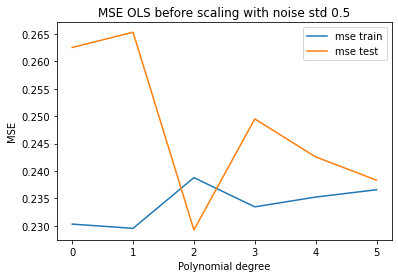

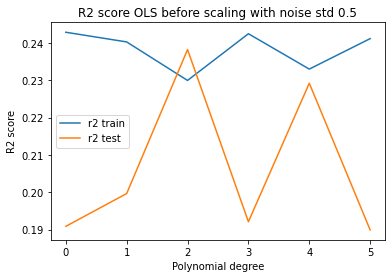

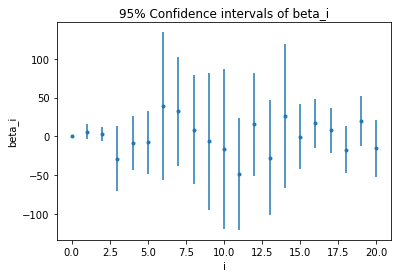

In [29]:
plt.plot(Polynomdegree, MSE_train, label='mse train')
plt.plot(Polynomdegree, MSE_test, label='mse test')
plt.title("MSE OLS before scaling with noise std 0.5")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.legend()
plt.show()


plt.plot(Polynomdegree, R2_train, label='r2 train')
plt.plot(Polynomdegree, R2_test, label='r2 test')
plt.title("R2 score OLS before scaling with noise std 0.5")
plt.xlabel("Polynomial degree")
plt.ylabel("R2 score")
plt.legend()
plt.show()

hessian_inverted = np.linalg.pinv(X_train.T.dot(X_train))
beta_sigma = np.sqrt(hessian_inverted.diagonal()) 
z_value = 1.96 # Confidence intervall of 95%


confidence_intervals = np.zeros([len(beta)])
for i in range(len(beta)):
    confidence_intervals[i] = (z_value * beta_sigma[i])


plt.errorbar(range(len(beta)), beta, yerr=confidence_intervals, fmt='.')
plt.xlabel('i')
plt.ylabel('beta_i')
plt.title('95% Confidence intervals of beta_i')
plt.show()

In [30]:
# Make data set.
np.random.seed(1337)
N = 50 #Number of points
n= 5 #Max polynomialdegree
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))

x_mesh, y_mesh = np.meshgrid(x,y)
x_flatten = np.ravel(x_mesh) 
y_flatten = np.ravel(y_mesh)


z  = FrankeFunction(x_flatten, y_flatten, 0.0)

R2_train = np.zeros(n+1)
R2_test = np.zeros(n+1)
MSE_train = np.zeros(n+1)
MSE_test = np.zeros(n+1)
Polynomdegree = np.zeros(n+1)                 

#Preforming OSL regression using the pseudo inverse functuinality in np.linalg in a for loop to give us R2 and MSE 
#for polynomials from degree 1-5 before the data is scaled and without noise
print("---standard scaling without noise---")
for i in range(n+1):
                  
    polynomialdegree = i
    Polynomdegree[i] =  polynomialdegree
                  
    X = create_x(x_flatten, y_flatten, n)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
    X_train, X_test, z_train, z_test = Scale(X_train, X_test, z_train, z_test) #Use the standard scaler
    beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train

    z_t = X_train @ beta
    z_pred = X_test @ beta
    R2_train[i] = R2(z_train, z_t)
    R2_test[i] =R2(z_test, z_pred)
    MSE_train[i] =  MSE(z_train, z_t) 
    MSE_test[i] =  MSE(z_test, z_pred)
                 
    print("--- Polynomial degree ", i,"---")  
    print("Training R2 for OLS degree")
    print (R2(z_train, z_t))
    print("Training MSE for OLS")
    print(MSE(z_train, z_t))
    print("Test R2 for OLS")
    print(R2(z_test, z_pred))
    print("Test MSE OLS")
    print(MSE(z_test, z_pred))
    print("")

---standard scaling without noise---
--- Polynomial degree  0 ---
Training R2 for OLS degree
0.976925778862064
Training MSE for OLS
0.023074221137935978
Test R2 for OLS
0.9745088416955692
Test MSE OLS
0.026680401347622066

--- Polynomial degree  1 ---
Training R2 for OLS degree
0.9761966403912887
Training MSE for OLS
0.023803359608711237
Test R2 for OLS
0.9770607042809301
Test MSE OLS
0.02426197939311059

--- Polynomial degree  2 ---
Training R2 for OLS degree
0.976943844963134
Training MSE for OLS
0.023056155036865932
Test R2 for OLS
0.9744438393219452
Test MSE OLS
0.029378344382897985

--- Polynomial degree  3 ---
Training R2 for OLS degree
0.9756298387183788
Training MSE for OLS
0.02437016128162122
Test R2 for OLS
0.9793771728295343
Test MSE OLS
0.02266976874185517

--- Polynomial degree  4 ---
Training R2 for OLS degree
0.9772235670094748
Training MSE for OLS
0.022776432990525175
Test R2 for OLS
0.9733396307693166
Test MSE OLS
0.026740592000199313

--- Polynomial degree  5 ---
Trai

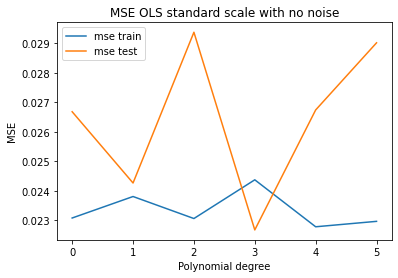

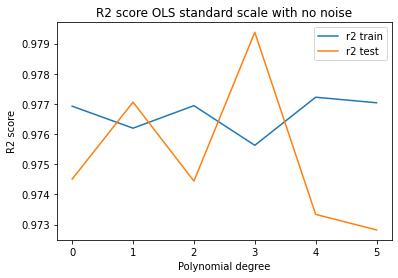

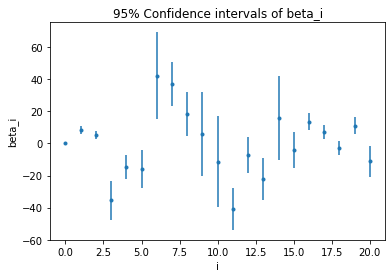

In [31]:
plt.plot(Polynomdegree, MSE_train, label='mse train')
plt.plot(Polynomdegree, MSE_test, label='mse test')
plt.title("MSE OLS standard scale with no noise")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.legend()
plt.show()


plt.plot(Polynomdegree, R2_train, label='r2 train')
plt.plot(Polynomdegree, R2_test, label='r2 test')
plt.title("R2 score OLS standard scale with no noise")
plt.xlabel("Polynomial degree")
plt.ylabel("R2 score")
plt.legend()
plt.show()

hessian_inverted = np.linalg.pinv(X_train.T.dot(X_train))
beta_sigma = np.sqrt(hessian_inverted.diagonal()) 
z_value = 1.96 # Confidence intervall of 95%


confidence_intervals = np.zeros([len(beta)])
for i in range(len(beta)):
    confidence_intervals[i] = (z_value * beta_sigma[i])


plt.errorbar(range(len(beta)), beta, yerr=confidence_intervals, fmt='.')
plt.xlabel('i')
plt.ylabel('beta_i')
plt.title('95% Confidence intervals of beta_i')
plt.show()

In [32]:
# Make data set.
np.random.seed(1337)
N = 50 #Number of points
n= 5 #Max polynomialdegree
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))

x_mesh, y_mesh = np.meshgrid(x,y)
x_flatten = np.ravel(x_mesh) 
y_flatten = np.ravel(y_mesh)


z  = FrankeFunction(x_flatten, y_flatten, 0.5)

R2_train = np.zeros(n+1)
R2_test = np.zeros(n+1)
MSE_train = np.zeros(n+1)
MSE_test = np.zeros(n+1)
Polynomdegree = np.zeros(n+1)                 

#Preforming OSL regression using the pseudo inverse functuinality in np.linalg in a for loop to give us R2 and MSE 
#for polynomials from degree 1-5 before the data is scaled and without noise
print("---standard scaling with noise std 0.5---")
for i in range(n+1):
                  
    polynomialdegree = i
    Polynomdegree[i] =  polynomialdegree
                  
    X = create_x(x_flatten, y_flatten, n)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
    X_train, X_test, z_train, z_test = Scale(X_train, X_test, z_train, z_test) #Use the standard scaler
    beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train

    z_t = X_train @ beta
    z_pred = X_test @ beta
    R2_train[i] = R2(z_train, z_t)
    R2_test[i] =R2(z_test, z_pred)
    MSE_train[i] =  MSE(z_train, z_t) 
    MSE_test[i] =  MSE(z_test, z_pred)
                 
    print("--- Polynomial degree ", i,"---")  
    print("Training R2 for OLS degree")
    print (R2(z_train, z_t))
    print("Training MSE for OLS")
    print(MSE(z_train, z_t))
    print("Test R2 for OLS")
    print(R2(z_test, z_pred))
    print("Test MSE OLS")
    print(MSE(z_test, z_pred))
    print("")

---standard scaling with noise std 0.5---
--- Polynomial degree  0 ---
Training R2 for OLS degree
0.24285991094515402
Training MSE for OLS
0.757140089054846
Test R2 for OLS
0.19085339090761377
Test MSE OLS
0.8630777218898081

--- Polynomial degree  1 ---
Training R2 for OLS degree
0.24026481321382986
Training MSE for OLS
0.75973518678617
Test R2 for OLS
0.19964027891216796
Test MSE OLS
0.8781700089787919

--- Polynomial degree  2 ---
Training R2 for OLS degree
0.22994935226115487
Training MSE for OLS
0.7700506477388451
Test R2 for OLS
0.23821425384910166
Test MSE OLS
0.7392880143101289

--- Polynomial degree  3 ---
Training R2 for OLS degree
0.24246145503336225
Training MSE for OLS
0.7575385449666378
Test R2 for OLS
0.1920870594652686
Test MSE OLS
0.8095922726715937

--- Polynomial degree  4 ---
Training R2 for OLS degree
0.23298566112569952
Training MSE for OLS
0.7670143388743005
Test R2 for OLS
0.22919762542697708
Test MSE OLS
0.7909123822846947

--- Polynomial degree  5 ---
Training

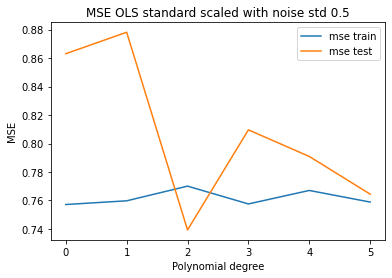

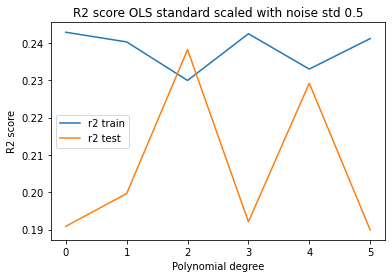

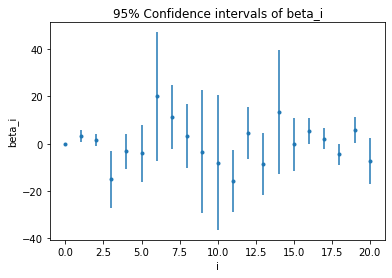

In [33]:
plt.plot(Polynomdegree, MSE_train, label='mse train')
plt.plot(Polynomdegree, MSE_test, label='mse test')
plt.title("MSE OLS standard scaled with noise std 0.5")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.legend()
plt.show()


plt.plot(Polynomdegree, R2_train, label='r2 train')
plt.plot(Polynomdegree, R2_test, label='r2 test')
plt.title("R2 score OLS standard scaled with noise std 0.5")
plt.xlabel("Polynomial degree")
plt.ylabel("R2 score")
plt.legend()
plt.show()

hessian_inverted = np.linalg.pinv(X_train.T.dot(X_train))
beta_sigma = np.sqrt(hessian_inverted.diagonal()) 
z_value = 1.96 # Confidence intervall of 95%


confidence_intervals = np.zeros([len(beta)])
for i in range(len(beta)):
    confidence_intervals[i] = (z_value * beta_sigma[i])


plt.errorbar(range(len(beta)), beta, yerr=confidence_intervals, fmt='.')
plt.xlabel('i')
plt.ylabel('beta_i')
plt.title('95% Confidence intervals of beta_i')
plt.show()